In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

### Prepare the data

In [4]:
from helpers import standardize

def prepare(x):
    """
    Prepare the data by standardizing and replacing unused 
    values (-999) by the mean of their columns such that they
    don't affect the computation then.
    """
    # Here we put the non sense values (-999) to 0 or mean 
    # such that they don't affect too much the prediction then
    xt = np.copy(x.T)
    for xi in xt:
        xi[xi==-999] = np.nan
        m = np.nanmean(xi)
        nanidx = np.where(np.isnan(xi))
        xi[nanidx] = m
        
    tx, mean, std = standardize(xt.T)
    
    return tx        


tx = prepare(tX)

### Exploratory data analysis

In [5]:
rows, features = tx.shape
print('Number of data entries:', rows)
print('Number of feature:', features)
print(tx.shape)
print(tx[:, 1].shape)
print(y)

Number of data entries: 250000
Number of feature: 31
(250000, 31)
(250000,)
[ 1. -1. -1. ...,  1. -1. -1.]


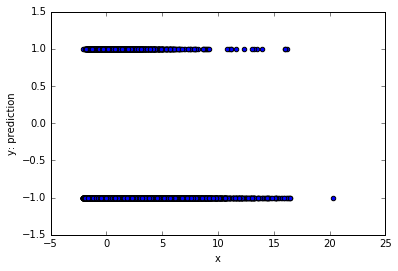

In [16]:
plt.rcParams['agg.path.chunksize'] = 10000
feature1 = tx[:, 1]
plt.scatter(feature1, y)
plt.xlabel('x')
plt.ylabel('y: prediction')
plt.show()

In [7]:
for f in range(0, 0):
    featureData = tx[:, f]
    plt.scatter(featureData, y)
    plt.xlabel('x')
    plt.ylabel('y: prediction')
    plt.show()

### Exploratory data comments

For feature : 

    4-  > 40 =>  1
    5-  > 6  =>  1
    
    1-  > 20 => -1 [10,20] => more likely to be -1
    3-  > 20 => -1
    21- > 10 => -1
    26- > 22 => -1
    29- > 13 => -1
    

## Process the Machine Learning

#### Differents learning methods

In [8]:
from least_squares import *
from regression import *

def learn_with(method, y, tx, gamma=0.05, max_iters=10, lambda_=0.1):
    
    initial_w, loss = least_squares(y, tx)
    
    if method == 'least_square_GD': 
        return least_squares_GD(y, tx, initial_w, max_iters, gamma)

    if method == 'least_square_SGD': 
        return least_squares_SGD(y, tx, initial_w, max_iters, gamma)

    if method == 'logistic_regression': 
        return logistic_regression(y, tx, initial_w, max_iters, gamma)

    if method == 'reg_logistic_regression': 
        return reg_logisitic_regression(y, tx, lambda_, initial_w, max_iters, gamma)
    
    if method == 'ridge_regression': 
        return ridge_regression(y, tx, lambda_)
    
    return initial_w, loss

#### Training phase

In [9]:
def compare_least_squares(y, tx):
    w3, l3 = learn_with("least_square", y, tx)
    w2, l2 = learn_with("least_square_GD", y, tx, 0.15, 50)
    w1, l1 = learn_with("least_square_SGD", y, tx, 0.5, 50)
    print("SGD")
    print(l1)
    print(w1)
    print("GD")
    print(l2)
    print(w2)
    print("--")
    print(l3)
    print(w3)
    

In [10]:
def compare_regression(y, tx):
    w1, l1 = learn_with('logistic_regression', y, tx)
    print("Log reg")
    print(l1)
    print(w1)
    #print(compute_loss(y, tx, w1))
    w2, l2 = learn_with('reg_logistic_regression', y, tx, 0.2, 200, 0.1)
    print("Reg Log reg")
    print(l2)
    print(w2)
    #print(compute_loss(y, tx, w2))
    w3, l3 = learn_with("ridge_regression", y, tx)
    print("Ridge reg")
    print(calculate_nll(y, tx, w3))
    #print(l3)
    print(w3)

Here we try to separate the different features of w and compute the minimum loss for each using the polynomial regression

In [11]:
def separate (y, tx):
    return 0

Step 1 over 30
Iter 0 loss = 0.661113376857
Iter 100 loss = 3.30815801991e+26
Iter 0 loss = 0.66086339717
Iter 100 loss = 2.51052759899e+28
Step 2 over 30
Iter 0 loss = 0.661113377174
Iter 100 loss = 2.45998275552e+27
Iter 0 loss = 0.660863413021
Iter 100 loss = 1.58967536095e+29
Step 3 over 30
Iter 0 loss = 0.661113377117
Iter 100 loss = 1.04901267569e+28
Iter 0 loss = 0.660863424871
Iter 100 loss = 5.64703169024e+29
Step 4 over 30
Iter 0 loss = 0.661113376839
Iter 100 loss = 2.98747090635e+28
Iter 0 loss = 0.660863433943
Iter 100 loss = 1.31003349119e+30
Step 5 over 30
Iter 0 loss = 0.661113377244
Iter 100 loss = 6.35691210597e+28
Iter 0 loss = 0.660863440379
Iter 100 loss = 2.2221600699e+30
Step 6 over 30
Iter 0 loss = 0.661113376721
Iter 100 loss = 1.09620850687e+29
Iter 0 loss = 0.660863444939
Iter 100 loss = 2.99728671247e+30
Step 7 over 30
Iter 0 loss = 0.661113376991
Iter 100 loss = 1.62452798315e+29
Iter 0 loss = 0.660863448339
Iter 100 loss = 3.41601673501e+30
Step 8 over 30


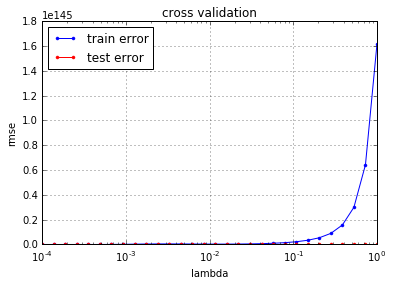

In [12]:
def train(y, tx):
    
    w, loss = learn_with("least_square_GD", y, tx)
    
    return w, loss

#loss, weights = train(y, tx)
#compare_least_squares(y, tx)
#compare_regression(y, tx)
#w, l = least_squares(y, tx)
#print(calculate_nll(y, tx, w))

from cross_validation import cross_validation_demo

initial_w = np.zeros((tx.shape[1]))
gamma = 0.1

ty = np.copy(y)
ty[ty==-1]=0

cross_validation_demo(ty, tx, initial_w, gamma)

Maybie a problem with loss computation ? To what should we go ? Here loss is going to inf or -inf depending on the lambdas and gamma..

## Generate predictions and save ouput in csv format for submission:

In [13]:
weights, loss = least_squares(y, tx)
print(weights)

[ -3.14664000e-01   9.63458000e-03  -2.54719228e-01  -2.63502968e-01
  -1.10181138e-03   2.18423831e-02   9.00537818e-02   4.83490552e-03
   2.82008766e-01  -2.81502578e-02  -3.29277403e+02  -1.88141151e-01
   1.18065030e-01   7.66172591e-02   6.39659203e+01  -7.79460481e-04
  -8.30656821e-04   6.30817546e+01  -8.61168784e-04   2.51791346e-03
   1.03659311e-01   9.33786079e-04  -4.70019027e-02   4.17575954e-02
  -4.75783459e-02   6.50726388e-04   1.88755844e-04  -3.66001845e-02
   1.55837343e-03  -1.74318684e-03   2.78942643e+02]


In [14]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


tx_Test_norm = prepare(tX_test)


In [15]:
OUTPUT_PATH = '../output/out.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tx_Test_norm)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)